# 19 Oct 23 - Activity: Normal Modes of N Coupled Oscillators

Now that we have discussed and built some facility with Lagrangian dynamics, let's see how using it makes our study of normal modes much simpler than Newtonian mechanics. We will couple this analysis to solving an eigenvalue problem by guessing the form of the solutions. This technique is very common in theoretical physics with different guesses for the solution forms giving rise to different eigenvalue problems (e.g., [Bessel functions for 2D surface problems](https://en.wikipedia.org/wiki/Bessel_function) or [Hermite polynomials for the Quantum Harmonic Oscillator](https://en.wikipedia.org/wiki/Hermite_polynomials).

## Three Coupled Oscillators

Consider the setup below consisting of three masses connected by springs to each other. We intend to find the normal modes of the system by denoting each mass's displacement ($x_1$, $x_2$, and $x_3$).

![3 Coupled Oscillators](../assets/images/3_coupled_osc.png)


## Finding the Normal Mode Frequencies

**&#9989; Do this** 

This is not magic as we will see, it follows from our choices of solution. Here's the steps and what you might notice about them:

1. Guess what the normal modes might look like? Write your guesses down; how should the masses move? (It's ok if you are not sure about all of them, try to determine one of them)
2. Write down the energy for the whole system, $T$ and $U$ (We have done this before, but not for this many particles)
3. Use the Euler-Lagrange Equation to find the equations of motion for $x_1$, $x_2$, and $x_3$. (We have done this lots, so make sure it feels solid)
4. Reformulate the equations of motion as a matrix equation $\ddot{\mathbf{x}} = \mathbf{A} \mathbf{x}$. What is $\mathbf{A}$? (We have done this, but only quickly, so take your time)
5. Consider solutions of the form $Ce^{i{\omega}t}$, plug that into $x_1$, $x_2$, and $x_3$ to show you get $\mathbf{A}\mathbf{x} = -\omega^2 \mathbf{x}$. (We have not done this, we just assumed it works! It's ok if this is annoying, we only have to show it once.)
6. Find the normal mode frequencies by taking the determinant of $\mathbf{A} - \mathbf{I}\lambda$. Note that this produces the following definition: $\lambda = -\omega^2$ (We have not done this together and we can if it's confusing.)

## Finding the Normal Modes Amplitudes

Ok, now we need to find the normal mode amplitudes. That is we assumed sinusoidal oscillations, but at what amplitudes? We will show how to do this with one frequency ($\omega_1$), and then break up the work of the the other two. These frequencies are:

$$\omega_A = 2\dfrac{k}{m}; \qquad \omega_B = \left(2-\sqrt{2}\right)\dfrac{k}{m}; \qquad \omega_C = \left(2+\sqrt{2}\right)\dfrac{k}{m}\qquad$$

**&#9989; Do this** 

After we do the first one, pick another frequencies and repeat. Answer the follow questions:

1. What does this motion physically look like? What are the masses doing?
2. How does the frequency of oscillation make sense? Why is it higher or lower than $\omega_A$?

## Finding the Eigenvalues and Eigenvectors using Numerical Approaches 
Now that we have developed solutions for the 3 coupled oscillators, let's try to reproduce that work numerically and plots the modes to make sense of what they are doing for us.

We can then apply these tools to $N$ identically coupled 1D oscillators.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la ## For the numerical eigenvalue methods
from sympy import * ## For symbolic eigenvalue methods
init_printing(use_unicode=True)  ## display nice math

We reduced our normal mode problem to the following:

$$\mathbf{A}\mathbf{x} = -\omega^2\mathbf{x}$$

And earlier we found these eigenvalues and eigenvectors for the 3 Oscillator model:

$$\omega_A = 2\dfrac{k}{m}; \qquad \omega_B = \left(2-\sqrt{2}\right)\dfrac{k}{m}; \qquad \omega_C = \left(2+\sqrt{2}\right)\dfrac{k}{m}\qquad$$

Python has two main libraries for helping us find these numerically. One is `numpy.linalg`, which is a powerful set of linear algebra tools that are used widely. The other is `sympy`, which is a symbolic calculator like Mathematica. Both will help you find eigenvalues and eigenvectors, but do so in entirely different ways. 

* `numpy.linalg` will use the common numerical tools that decompose matrices. For example, [LU decomposition](https://en.wikipedia.org/wiki/LU_decomposition) is one of the most common techniques to use for symmetric and Hermitian matrices, which are the most common in physics.
* `sympy` is a symbolic calculator, that attempts to determine a closed form solution for the eigenvalues. These methods are often proprietary (e.g., Mathematica and Matlab), but the source code for [sympy is available to review](https://github.com/sympy/sympy).

At issue is that each of these methods requires a slight different input. The first method will take a `numpy` matrix, but the second requires a `sympy` matrix, which can we easily constructed from our `numpy` matrix. 

Below, we form both matrices.


In [2]:
M = np.matrix([[-2, 1, 0], [1, -2, 1], [0, 1, -2]]) ## numpy matrix
M2 = Matrix(M) ## Take numpy matrix and make it a sympy one
print(M)
print(M2)

[[-2  1  0]
 [ 1 -2  1]
 [ 0  1 -2]]
Matrix([[-2, 1, 0], [1, -2, 1], [0, 1, -2]])


Finding eigenvalues with numpy.lingalg is quite simple. We just call `eigenvals, eigenvecs = la.eig(M)`. Note they are numericaly values. Also, these eigenvectors are normalized. Do you notice anything strange?


In [3]:
eigenvals, eigenvecs = la.eig(M)
print(eigenvals)
print(eigenvecs)


[-3.41421356 -2.         -0.58578644]
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01 -4.05405432e-16  7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


Finding the eigenvectors and eigenvalues with `sympy` is just as simple. Notice that these are symbolic and the eigenvectors are NOT normalized.

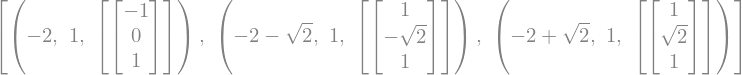

In [4]:
M2.eigenvects()

## Plotting the modes

Awesome. Now we have our modes, but what do they mean? Remember, in a given mode every object oscillates at the mode frequency, just with different amplitudes. That means everyone has the following form:

$$A\cos(\omega t)$$

just with different $A$'s. So plot the motion of each mass in each mode. Make sure you have the right frequencies with the right modes.

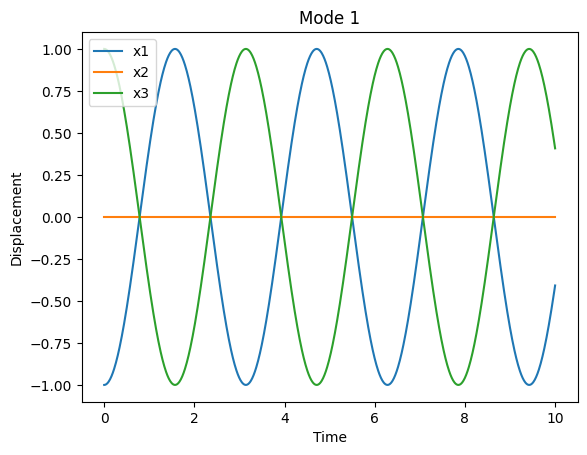

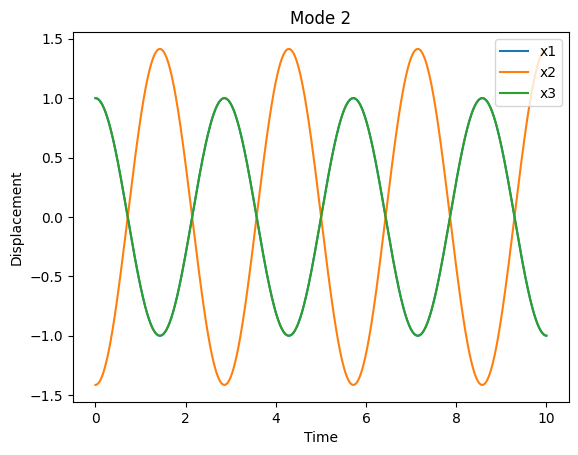

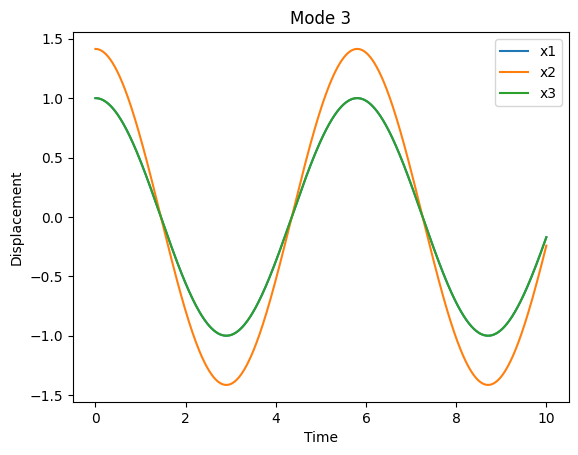

In [5]:
## Analysis and Plotting code here
t = np.linspace(0, 10, 1000)
k = 2
m = 1
w1 = np.sqrt(2*k/m)
w2 = np.sqrt((2+np.sqrt(2)*k)/m)
w3 = np.sqrt(((2-np.sqrt(2))*k)/m)





x1 = -1* np.cos(w1*t)
x2 = 0*np.cos(w1*t)
x3 = np.cos(w1*t)


plt.figure()
plt.title('Mode 1')   
plt.plot(t, x1, label='x1')
plt.plot(t, x2, label='x2')
plt.plot(t, x3, label='x3')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()


x1 = np.cos(w2*t)
x2 = -sqrt(2)*np.cos(w2*t)
x3 = np.cos(w2*t)


plt.figure()
plt.title('Mode 2')   
plt.plot(t, x1, label='x1')
plt.plot(t, x2, label='x2')
plt.plot(t, x3, label='x3')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()

x1 = np.cos(w3*t)
x2 = np.sqrt(2)*np.cos(w3*t)
x3 = np.cos(w3*t)

plt.figure()
plt.title('Mode 3')   
plt.plot(t, x1, label='x1')
plt.plot(t, x2, label='x2')
plt.plot(t, x3, label='x3')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()






## Extending your work

Given what we have done thus far, you can see that we could easily construct the matrix for a $N$ dimensional chain of 1D oscillators. So let's do that.

Repeat this analysis for a set of $N$ oscillators. Your code should be able to:

1. Take a value of $N$ and construct the right matrix representation
2. Find the eigenvalues and eigenvectors for this matrix.
3. (BONUS) plots the modes automatically
4. (CHALLENGE) time the execution of the analysis

Be careful not to pick to large of an $N$ value to work with because you could melt your CPU easily. Make sure your code can do something like $N=10$. If you get the timing working, plot time vs number of objects to see how the problem scales with more oscillators.


In [9]:
## Your code here

N = 10
A = np.zeros((N,N))

#Set diags to -2
np.fill_diagonal(A, -2)
np.fill_diagonal(A[1:], 1)
np.fill_diagonal(A[:,1:], 1)

A = np.matrix(A)

eigenvals, eigenvecs = la.eig(A)
print(eigenvals)
print(eigenvecs)







[-3.91898595 -3.68250707 -3.30972147 -2.83083003 -2.28462968 -1.71537032
 -0.08101405 -0.31749293 -0.69027853 -1.16916997]
[[-0.12013117 -0.23053002  0.3222527   0.38786839 -0.42206128  0.42206128
  -0.12013117  0.23053002 -0.3222527  -0.38786839]
 [ 0.23053002  0.38786839 -0.42206128 -0.3222527   0.12013117  0.12013117
  -0.23053002  0.38786839 -0.42206128 -0.3222527 ]
 [-0.3222527  -0.42206128  0.23053002 -0.12013117  0.38786839 -0.38786839
  -0.3222527   0.42206128 -0.23053002  0.12013117]
 [ 0.38786839  0.3222527   0.12013117  0.42206128 -0.23053002 -0.23053002
  -0.38786839  0.3222527   0.12013117  0.42206128]
 [-0.42206128 -0.12013117 -0.38786839 -0.23053002 -0.3222527   0.3222527
  -0.42206128  0.12013117  0.38786839  0.23053002]
 [ 0.42206128 -0.12013117  0.38786839 -0.23053002  0.3222527   0.3222527
  -0.42206128 -0.12013117  0.38786839 -0.23053002]
 [-0.38786839  0.3222527  -0.12013117  0.42206128  0.23053002 -0.23053002
  -0.38786839 -0.3222527   0.12013117 -0.42206128]
 [ 0

## Even further

These models can be used with lattices (solid objects). Draw a sketch of 4 oscillators in a plane connected together in a square shape. Write down the energy equations for this system (assume the springs do not move laterally much). What do the EOMs look like?